# Practical Guide to Data Analysis and Applied Machine Learning using Python
*A hands-on guide to mastering the first baby steps in building Machine Learning applications.*

Machine Learning is continuously evolving. Along with that evolution comes a spike in demand and importance. Corporations and startups are needing Data Scientists and Machine Learning Engineers now more than ever to turn those troves of data into useful wisdom. There’s probably not a better time than now (except 5 years ago) to delve into Machine Learning. And of course, there’s not a better tool to develop those applications than Python. Python has a vibrant and active community. Many of its developers came from the scientific community, thus providing Python with vast numbers of libraries for scientific computing. 

In this article, we will discuss some of the features of Python’s key scientific libraries and also employ them in a proper Data Analysis and Machine Learning workflow.

What you will learn;
- Understand what Pandas is and why it is very integral to your workflow.
- How to use Pandas to inspect your dataset
- How to prepare the data and feature-engineer with Pandas
- Understand why Data Visualization matters.
- How to visualize data with Matplotlib and Seaborn.
- How to build a statistical model with Statsmodel.
- How to build an ML model with Scikit-Learn's algorithms.
- How to rank your model’s feature importances and perform feature selection.

If you’d like to go straight to code, it is [here on GitHub](https://github.com/SteveKola/Python-ML-Blueprints/blob/master/1.-Baby-Steps-into-Data-Analysis-and-Machine-Learning/Baby%20steps%20into%20ML.ipynb).

**Disclaimer:** This article assumes that 
- You have at least, a usable knowledge of Python and
- You already are familiar with [the Data Science/Machine Learning workflow](https://steventure.hashnode.dev/the-data-sciencemachine-learning-workflow-ckdslw7ps00egb6s1gla942wv).

## Pandas
Pandas is an extraordinary tool for data analysis built with the goal of becoming the most powerful and flexible open-source data analysis/manipulation tool available in any language.
Let’s take a look at what Pandas is capable of:

### Data Acquisition

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris_data = datasets.load_iris()

In [2]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df_data = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])

In [5]:
df_target = pd.DataFrame(iris_data['target'], columns=['species'])

In [6]:
df = pd.concat([df_data, df_target], axis=1)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In the above cells, you’d notice that I have imported the classic dataset, [the Iris dataset, using Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) (we’ll explore Scikit-learn later on). I then passed the data into a Pandas DataFrame while also including the column headers. I also created another DataFrame to contain the iris species which were code-named `0` for `setosa`, `1` for `versicolor`, and `2` for `virginica`. The final step was to concatenate the two DataFrames into a single DataFrame.

When working with data that can fit on a single machine, Pandas is the ultimate tool. It’s more like Excel, but on steroids. Just like Excel, the basic units of operations are rows and columns where columns of data are Series, and a collection of Series is the DataFrame.


## Exploratory Data Analysis

Let’s perform a few common operations;

### Data Slicing


In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

The `.head()` command will return the first 5 rows. The second command was to select a single column from the DataFrame by referencing it with the column name. 

A different way of performing [data slicing](https://whatis.techtarget.com/definition/slice-and-dice) is by using the `loc` and `iloc` methods.

To use `iloc`, we have to specify the rows and columns we want to slice by their integer index, while for `loc`, we have to specify the names of the columns that we want to filter out.

`loc` gets row (or columns) **with a particular label** from the index while `iloc` gets rows (or columns)  location **at particular positions** in the index (so it only takes integers)

In [10]:
df.iloc[:3, :2]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


Using `.iloc`, we just selected the first 3 rows and 2 columns of the DataFrame. Let’s try something more difficult;

In [11]:
df.loc[:3, [x for x in df.columns if 'width' in x]]

,sepal width (cm),petal width (cm)
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2


Here we iterate through `df.columns`, which would return a list of columns, and select only the columns with ‘width’ in their names. This seemingly small function is quite a powerful tool when employed on far larger datasets.

Next, let’s use another way of selecting a portion of the data by specifying a condition to be satisfied. We’ll look at the unique list of `species`, then select one of those.

In [12]:
# Listing all the available unique classes

df['species'].unique()

array([0, 1, 2])

In [13]:
df[df['species'] == 2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


Notice that our DataFrame only contains rows of `Iris-virginica` species (represented by 2). In fact, the size is 50, as opposed to the original 150 rows.

In [14]:
df.count()

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
species              150
dtype: int64

In [15]:
df[df['species'] == 2].count()

sepal length (cm)    50
sepal width (cm)     50
petal length (cm)    50
petal width (cm)     50
species              50
dtype: int64

You’d also notice that the index on the left retains the original row numbers, which might cause issues later. So we could save it as a new DataFrame and reset the index.

In [16]:
virginica = df[df['species'] == 2].reset_index(drop=True)
virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.3,3.3,6.0,2.5,2
1,5.8,2.7,5.1,1.9,2
2,7.1,3.0,5.9,2.1,2
3,6.3,2.9,5.6,1.8,2
4,6.5,3.0,5.8,2.2,2
5,7.6,3.0,6.6,2.1,2
6,4.9,2.5,4.5,1.7,2
7,7.3,2.9,6.3,1.8,2
8,6.7,2.5,5.8,1.8,2
9,7.2,3.6,6.1,2.5,2


We selected this new DataFrame by specifying a condition. Now let’s add more conditions. We’ll specify two conditions on our original DataFrame.

In [17]:
df[(df['species'] == 2) & (df['petal width (cm)'] > 2.2)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,2
109,7.2,3.6,6.1,2.5,2
114,5.8,2.8,5.1,2.4,2
115,6.4,3.2,5.3,2.3,2
118,7.7,2.6,6.9,2.3,2
120,6.9,3.2,5.7,2.3,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2


You may reset the index of this new DataFrame by yourself, as an exercise.

### Descriptive Statistics

Now let’s try and get some descriptive statistics from our dataset;

In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Using `.describe()` method, I just received a breakdown of the descriptive statistics for each of the columns. I could spot the counts of all the columns and easily note if there are missing values. I could see the mean, standard deviation, median, mode, and I could also note if the data is skewed. I could also pass in my own percentiles if I want more granular information;


In [19]:
# Passing in custom percentiles

df.describe(percentiles=[.2, .4, .8, .9, .95])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
20%,5.000000,2.700000,1.500000,0.200000,0.000000
40%,5.600000,3.000000,3.900000,1.160000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
80%,6.520000,3.400000,5.320000,1.900000,2.000000
90%,6.900000,3.610000,5.800000,2.200000,2.000000
95%,7.255000,3.800000,6.100000,2.300000,2.000000


Now let’s check if there is any correlation between the features by calling `.corr()` method on the DataFrame;

In [20]:
# Checking for correlations between the features

df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


I find it surprising that `sepal length` and `sepal width` has the lowest correlation with a score of **-0.117570**.

Now that we’ve understood how to select subsets of our DataFrame and how to summarize its statistics, let’s try and visually inspect our data.

## Data Visualization

You might wonder why we should even bother with visualization. The fact is that Data Visualization makes data easier for the human brain to understand and we can easily detect trends, patterns, and outliers in our data by performing a visual inspection.

So now that we understand the importance of visualization, let’s take a look at a pair of Python libraries that do this best.

## The Matplotlib Library

Matplotlib is the great grandfather of all Python plotting libraries. It was originally created to emulate the plotting functionality of MATLAB, and it grew into a giant in its own right. 

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The first line imports Matplotlib while the 2nd line sets our plotting style to resemble [R’s ggplot library](https://ggplot2.tidyverse.org/reference/ggplot.html).

Now let’s generate our first graph with the following code on our regular dataset;


Text(0.5, 1.0, 'Iris Petal Width')

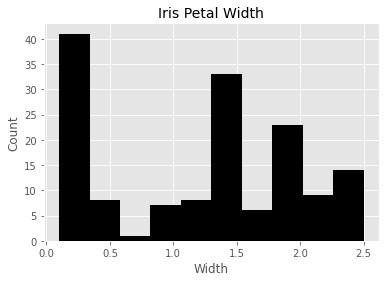

In [22]:
# Plotting an histogram of the petal width feature

plt.figure(figsize=(6,4))
plt.hist(df['petal width (cm)'], color='black')
plt.xlabel('Width', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Iris Petal Width', fontsize=14,)

Let’s go through the code line by line:

- The first line creates a ‘plotting space’ with a width of 6 inches and a height of 4 inches.
- The second line creates a histogram of the petal width column and we also set the bar color to black.
- We labeled the x and y axes with ‘Width’ and ‘Count’ respectively while also setting the font size to 12.
- The final line creates the title “Iris Petal Width’ with a font size of 14.

All these together gives us a nicely labeled histogram of our petal width data!

Let’s now expand on that and generate histograms for each column of our Iris dataset;


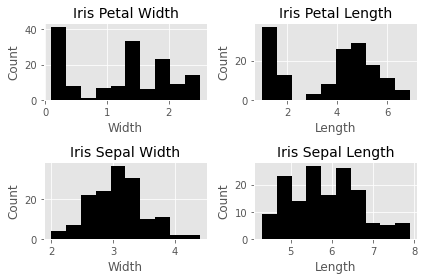

In [23]:
# Plotting subplots of the 4 features (NOTE: THIS IS NOT IDEAL!)

fig, ax = plt.subplots(2, 2, figsize=(6,4))

ax[0][0].hist(df['petal width (cm)'], color='black')
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_title("Iris Petal Width", fontsize=14)

ax[0][1].hist(df['petal length (cm)'], color='black')
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_title("Iris Petal Length", fontsize=14)

ax[1][0].hist(df['sepal width (cm)'], color='black')
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_title("Iris Sepal Width", fontsize=14)

ax[1][1].hist(df['sepal length (cm)'], color='black')
ax[1][1].set_xlabel('Length', fontsize=12)
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_title("Iris Sepal Length", fontsize=14)

plt.tight_layout()

This is not the most efficient way to do this, obviously, but it is quite useful to demonstrate how Matplotlib works. With the previous example, this is almost self-explanatory except that we now have four subplots that can be accessed through the ax array. Another addition is the `plt.tight_layout()` call, which we nicely auto-space our subplots to avoid crowding.

Let’s now take a look at the other kinds of plots available in Matplotlib. One is **scatterplot**. Here we plot the petal width against the petal length;


Text(0.5, 1.0, 'Petal Scatterplot')

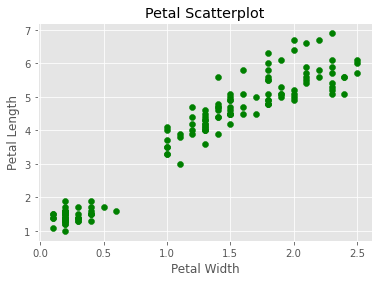

In [24]:
# A scatterplot of the Petal Width against the Petal Length

plt.scatter(df['petal width (cm)'], df['petal length (cm)'], color='green')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Scatterplot')

Another plot is a simple line plot. Here is a line plot of the petal length;

Text(0.5, 1.0, 'Petal Length Plot')

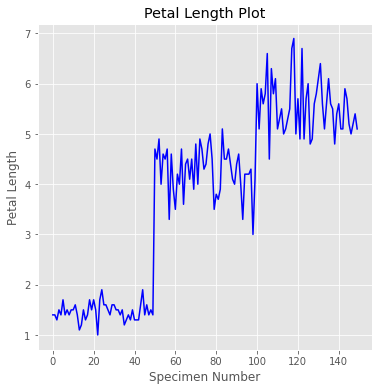

In [25]:
# A simple line plot of the Petal Length

plt.figure(figsize=(6,6))
plt.plot(df['petal length (cm)'], color='blue')
plt.xlabel('Specimen Number')
plt.ylabel('Petal Length')
plt.title('Petal Length Plot')

We can see here that there are three distinct clusters in this plot, presumably for each kind of species. This tells us that the petal length would most likely be a useful feature to denote the species if we build a classifier model.

Finally, let’s look at the bar chart. Here we’ll plot a bar chart for the mean of each feature for the three species of irises. Also, we will make it a stacked bar chart, to spice things up.

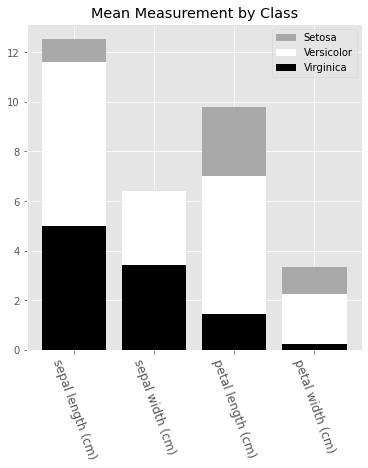

In [26]:
# A Bar-chart of the mean of each feature for the 3 classes of irises

fig, ax = plt.subplots(figsize=(6,6))
labels = [x for x in df.columns if 'length' in x or 'width' in x]

ver_y = [df[df['species'] == 0][x].mean() for x in labels]
vir_y = [df[df['species'] == 1][x].mean() for x in labels]
set_y = [df[df['species'] == 2][x].mean() for x in labels]
x = np.arange(len(labels))

plt.bar(x, vir_y, bottom=set_y, color='darkgrey')
plt.bar(x, set_y, bottom=ver_y, color='white')
plt.bar(x, ver_y, color='black')

plt.xticks(x)
ax.set_xticklabels(labels, rotation=-70, fontsize=12);
plt.title('Mean Measurement by Class')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

To generate a bar chart, we need to pass in the x and y values into `.bar()`. Here, the x values is an array of the length of the features that we are interested in. We also called the `.setxtickslabels()` and passed in our preferred column names for display. 

To line up the x labels properly, we also adjusted the spacing of the labels. This is why we set the xticks to x plus half the size of the bar_width. 

The y values come from taking the mean of each feature for each species, and we called each by calling `.bar()`. 
We also pass in a bottom parameter for each series, to set the minimum y point and the maximum y point of the series below it. This is what creates the stacked bars. 

And finally, we add a legend, which describes each series. The names are inserted into the legend list in order of the placement of the bars from top to bottom.

## The Seaborn Library

The next visualization library we'll have a look at is Seaborn. Seaborn is built on Matplotlib, and it is built for statistical visualizations. This means that it is tailor-made for structured data (data in rows and columns).

Now let's have a taste of the power of Seaborn. With just two lines of code, we'd get the following;

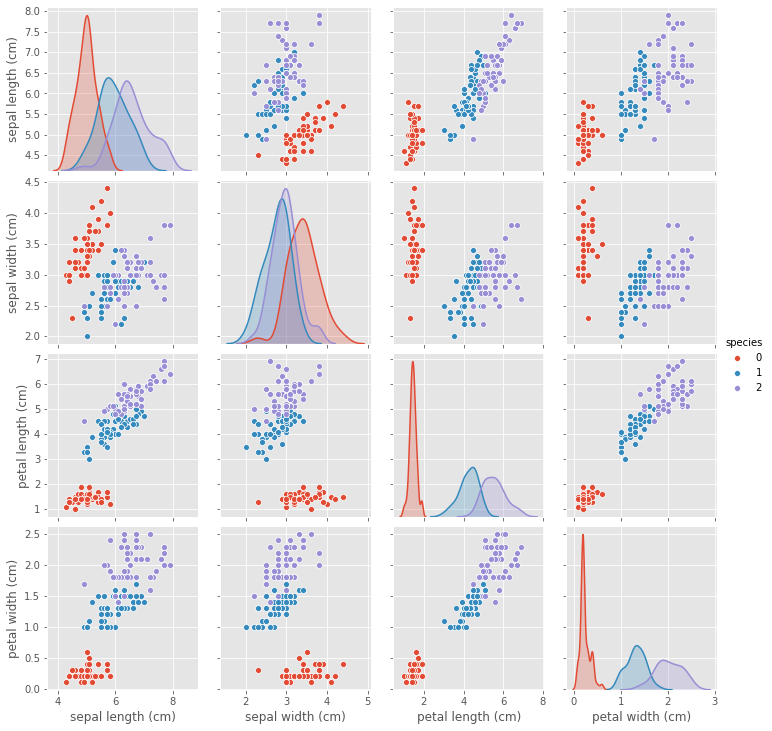

In [27]:
import seaborn as sns

sns.pairplot(df, hue='species')

Having just gone through (what I hope it's not) a torrid time understanding the intricacies of Matplotlib, you'd appreciate the simplicity and easy with which we generated this plot. All of our features were created and properly labelled with just two lines of code. 

You'd probably wonder why you'd want to use Matplotlib when Seaborn is so effortless to use. As I said earlier, Seaborn is built on Matplotlib, and you'd have to combine the functions of Seaborn with that of Matplotlib at times for modification. Let's try out this next visualization;

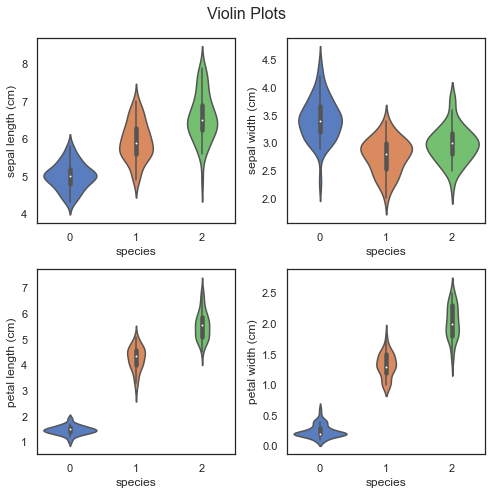

In [28]:
sns.set(style='white', palette='muted')
features = [col for col in df.columns if '(cm)' in col]

plt.figure(figsize=(7, 7))
for n in range(len(features)):
    plt.subplot(2, 2, n+1)
    sns.violinplot(x='species', y=features[n], data=df)
    
plt.suptitle('Violin Plots', fontsize=16)
plt.tight_layout()

We have generated a violin plot for each of the four features. A violin plot displays the distribution of the features. For example, you can easily see that the petal length of `setosa` **(0)** is highly clustered between 1 cm and 2 cm, while `virginica` **(2)** is much more dispersed, from nearly 4 cm to over 7 cm. 

You will also notice that we have used much of the same code we used when constructing the matplotlib graphs. The main difference is the addition of the `sns.plot()` calls, in lieu of the previous `plt.plot()` and `ax.plot()` calls.

There are a wide range of graphs that you can create with [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html), and I'd highly recommend delving into the documentation for these two libraries.

The ones we've discussed here should go a long way in helping you visualize and understand your subsequent data.

## Data Preparation

Having understand how to inspect and visualize our data, the next step is to learn how to process and manipulate our data. And here, we'd be working with `map()`, `apply()`, `applymap()`, and `groupby()` functions of Pandas. They are invaluable with working with Data, and they are very useful for feature engineering, which is the art of creating new features.

### map

The `map` function works only on series, so we'll use it to transform a column of our DataFrame, which is a Pandas series. Suppose we decide that we're tired of using the species code numbers? We can use `map` with a Python dictionary to achieve this. The keys will be the code numbers while the values will be the replacements

In [29]:
# Replacing each of the unique Iris types

dict_map = {0: 'SET', 
            1: 'VIR', 
            2: 'VER'}
df['species'] = df['species'].map(dict_map)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VER
146,6.3,2.5,5.0,1.9,VER
147,6.5,3.0,5.2,2.0,VER
148,6.2,3.4,5.4,2.3,VER


Here we have passed in our dictionary, and the `map` function ran through our entire data, changing the code numbers to their replacements everywhere it encounters them. 

Had we chosen another name for our column, say `better names`, we'd have had a new column called `better names` appended to our DataFrame, and we'd still have the `species` column with the new `better names` column.

We could also pass a series or a function into our `map` function, but we can also do this using the `apply` function (as we'd see soon). What sets the `map` function apart is the ability to pass in a Dictionary, hence making `map` the go-to function for most single-column transformation.

### apply

Unlike `map`, `apply` works on both series (single columns) and dataframes (collections of series). Now let's create a new column based on Petal width using the Petal width's mean (1.3) as the deciding factor.

If the `petal width` is greater than the mean, we'd set `wide petal` to 1, while if it is lower than the mean, we'd set `wide petal` to 0.

In [30]:
# Creating a new feature via petal width

df['wide petal'] = df['petal width (cm)'].apply(lambda x: 1 if x>=1.3 else 0)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VER,1
146,6.3,2.5,5.0,1.9,VER,1
147,6.5,3.0,5.2,2.0,VER,1
148,6.2,3.4,5.4,2.3,VER,1


Here, we ran `apply` on the `petal width` column that returned the corresponding values in the `wide petal` column. The `apply` function works by running through each value of the `petal width` column. If the value is greater than or equal to 1.3, the function returns 1, otherwise it returns 0. 

This type of transformation is a fairly common Feature Engineering technique in Machine Learning, so it is good to be familiar with how to perform it.

Now, let's look at how to use apply across a DataFrame, and not just on a single Series. We'll create a new column based on the petal area.

In [31]:
# creating a new column via petal length & petal width

df['petal area'] = df.apply(lambda row: row['petal width (cm)'] * row['petal length (cm)'], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VER,1,11.96
146,6.3,2.5,5.0,1.9,VER,1,9.50
147,6.5,3.0,5.2,2.0,VER,1,10.40
148,6.2,3.4,5.4,2.3,VER,1,12.42


Notice that we called `apply` on the whole DataFrame here, and we also pass in a new argument, `axis=1`, so as to select the columns sequentially and apply the function row-wise. Had we set `axis` to 0, then the function would operate column-wise and throw up an error.

So for every row in the DataFrame, we multiply its `petal width` with its `petal length`, hereby creating a resultant series, `wide petal`.

This kind of power and flexibility is what makes Pandas an indispensable tool for Data Manipulation.

### applymap

The `applymap` function is the tool to use when we want to manipulate all the data cells in a DataFrame. Let's take a look at this;

In [32]:
# Getting the log values of all the data cells

df.applymap(lambda x: np.log(x) if isinstance(x, float) else x)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,SET,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,SET,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,SET,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,SET,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,SET,0,-1.272966
...,...,...,...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909,VER,1,2.481568
146,1.840550,0.916291,1.609438,0.641854,VER,1,2.251292
147,1.871802,1.098612,1.648659,0.693147,VER,1,2.341806
148,1.824549,1.223775,1.686399,0.832909,VER,1,2.519308


Here we performed a log transformation (using Numpy) on the entire data and the condition stated is that the data cell must belong to a **float** instance. 

Common applications of `applymap` includes transforming or formatting each cell based on meeting a number of conditions.

### groupby

And now, let's have a look at an incredibly useful tool, but one that new Pandas users struggle to wrap their heads around. We'll examine a number of examples in order to illustrate its common functionalities.

The `groupby` function does exactly what it is named: it groups data based on a class or some classes you choose. Let's try out the first example;

In [33]:
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),wide petal,petal area
species,,,,,,
SET,5.006,3.428,1.462,0.246,0.0,0.3656
VER,6.588,2.974,5.552,2.026,1.0,11.2962
VIR,5.936,2.770,4.260,1.326,0.7,5.7204


Here, data for each species is partitioned and the mean for each feature is provided. Now let's take a larger step and get descriptive statistics for each species;

In [34]:
# T for transpose

df.groupby('species').describe().T

species                        SET        VER        VIR
sepal length (cm) count  50.000000  50.000000  50.000000
                  mean    5.006000   6.588000   5.936000
                  std     0.352490   0.635880   0.516171
                  min     4.300000   4.900000   4.900000
                  25%     4.800000   6.225000   5.600000
                  50%     5.000000   6.500000   5.900000
                  75%     5.200000   6.900000   6.300000
                  max     5.800000   7.900000   7.000000
sepal width (cm)  count  50.000000  50.000000  50.000000
                  mean    3.428000   2.974000   2.770000
                  std     0.379064   0.322497   0.313798
                  min     2.300000   2.200000   2.000000
                  25%     3.200000   2.800000   2.525000
                  50%     3.400000   3.000000   2.800000
                  75%     3.675000   3.175000   3.000000
                  max     4.400000   3.800000   3.400000
petal length (cm) count  50.000000  50.000000  50.000000
                  mean    1.462000   5.552000   4.260000
                  std     0.173664   0.551895   0.469911
                  min     1.000000   4.500000   3.000000
                  25%     1.400000   5.100000   4.000000
                  50%     1.500000   5.550000   4.350000
                  75%     1.575000   5.875000   4.600000
                  max     1.900000   6.900000   5.100000
petal width (cm)  count  50.000000  50.000000  50.000000
                  mean    0.246000   2.026000   1.326000
                  std     0.105386   0.274650   0.197753
                  min     0.100000   1.400000   1.000000
                  25%     0.200000   1.800000   1.200000
                  50%     0.200000   2.000000   1.300000
                  75%     0.300000   2.300000   1.500000
                  max     0.600000   2.500000   1.800000
wide petal        count  50.000000  50.000000  50.000000
                  mean    0.000000   1.000000   0.700000
                  std     0.000000   0.000000   0.462910
                  min     0.000000   1.000000   0.000000
                  25%     0.000000   1.000000   0.000000
                  50%     0.000000   1.000000   1.000000
                  75%     0.000000   1.000000   1.000000
                  max     0.000000   1.000000   1.000000
petal area        count  50.000000  50.000000  50.000000
                  mean    0.365600  11.296200   5.720400
                  std     0.181155   2.157412   1.368403
                  min     0.110000   7.500000   3.300000
                  25%     0.280000   9.717500   4.860000
                  50%     0.300000  11.445000   5.615000
                  75%     0.420000  12.790000   6.750000
                  max     0.960000  15.870000   8.640000

Now we have the total statistics breakdown. When visualizing, we noticed that there are some boundaries setting `petal width` and `petal length` of each species apart. So let's explore how we may use `groupby` to see that;

In [35]:
# Group the classes by the petal width they are associated with

df.groupby('petal width (cm)')['species'].unique().to_frame()

,species
petal width (cm),
0.1,[SET]
0.2,[SET]
0.3,[SET]
0.4,[SET]
0.5,[SET]
0.6,[SET]
1.0,[VIR]
1.1,[VIR]
1.2,[VIR]


So here, we grouped the `species` by `petal width`, another step we could try (as an exercise) is to partitioned the data into brackets using `apply`.

Finally, let's have a look at a custom aggregation function.

In [36]:
df.groupby('species')['petal width (cm)'].agg(lambda x: x.max() - x.min())

species
SET    0.5
VER    1.1
VIR    0.8
Name: petal width (cm), dtype: float64

Here, we grouped `petal width` by `species` and used a `lambda` function to get the difference between the maximum `petal width` and the minimum `petal width`.

Note that we've scratched at the surfaces of `groupby` and the other Pandas functions. I greatly encourage you to check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/) and learn more about the workings of Pandas.

## Modelling and Evaluation
Now that you've had a solid understanding of how to manipulate and prepare data, we'll move on to the next step, which is Modelling. 

Here, we'll discuss the primary Python libraries being used for Machine Learning.

### Statsmodels

Statsmodels is a Python package built for exploring data, estimating models, and running statistical tests. Here, we will use it build a simple Linear Regression model of the relationship between the `sepal length` and `sepal width` of the `setosa` species.

Let's create a scatterplot for visual inspection of the relationship;

Text(0.5, 1.02, 'Setosa Sepal Width vs. Length')

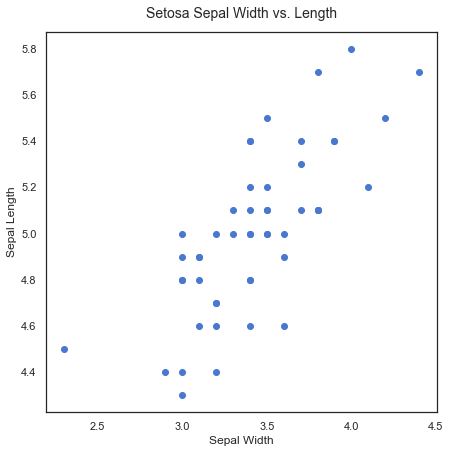

In [37]:
plt.figure(figsize=(7,7))
plt.scatter(df['sepal width (cm)'][:50], df['sepal length (cm)'][:50])
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Setosa Sepal Width vs. Length', fontsize=14, y=1.02)

We can see that there's a positive linear relationship between the two features. The sepal width increases as the sepal length increases. Next steps is to run a linear regression on the data using `statsmodels` to estimate the strength of the relationship.

In [38]:
import statsmodels.api as sm

In [39]:
y = df['sepal length (cm)'][:50]
x = df['sepal width (cm)'][:50]
X = sm.add_constant(x)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sepal length (cm)   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           6.71e-10
Time:                        18:57:12   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6390      0.310      8.513      0.000       2.016       3.262
sepal width (cm)     0.6905      0.090      7.681      0.000       0.510       0.871
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.464
Skew:                          -0.041   Prob(JB):                        0.793
Kurtosis:                       2.535   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, here's the results of our simple regression model. Since this is a linear regression, the model takes the format of `Y = Β0+ Β1X`, where `B0` is constant (or intercept) and `B1` is the regression coefficient. Here, the formula would be `Sepal Length = 2.6447 + 0.6909 * Sepal Width`. We can also see that the `R2` for the model is a respectable 0.558, and the `p-value`, (Prob), is quite significant.

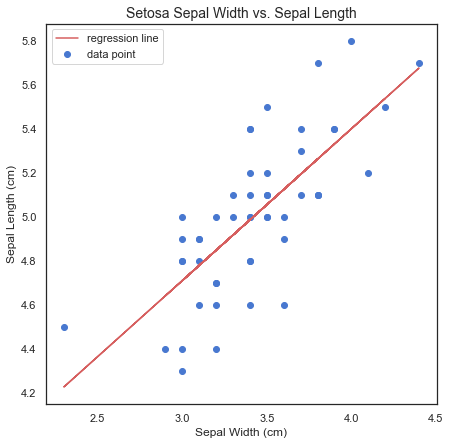

In [40]:
plt.figure(figsize=(7,7))
plt.plot(x, results.fittedvalues, label='regression line', color='r')
plt.scatter(x, y, label='data point')
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Sepal Width (cm)')
plt.title('Setosa Sepal Width vs. Sepal Length', fontsize=14,)
plt.legend(loc=0)

Plotting results.fittedvalues gets us the resulting regression line from our regression.

There are a number of other statistical functions and tests in the statsmodels package, but this by far, the most commonly-used test.

Let's now move on to the kingpin of Python machine learning packages; All Hail Scikit-learn!

### Scikit-Learn

Scikit-learn is an amazing Python library with an outstanding documentation, designed to provide a consistent API to dozens of algorithms. It is built upon,
and is itself, a core component of the Python scientific stack, which includes NumPy, SciPy, Pandas, and Matplotlib. Here are some of the areas scikit-learn
covers: classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.

Now, let's build a classifier with our iris data, and then we'll look at how we can evaluate our model using the tools of scikit-learn:

1. The data should be split into the predictors and the target; The predictors (independent variables) should be a numeric `n × m` matrix, X, and the target (dependent variable), y, an `n × 1` vector.
2. These are then passed into the `.fit()` method on the chosen classifier.
3. And then we can use `.predict()` method to make predictions on new data.

This is the greatest benefit of using scikit-learn: each classifier utilizes the same methods to the extent possible. This makes swapping them in and out a breeze. We'll see this in action soon.

In [41]:
from sklearn.model_selection import train_test_split as tts

y = df.pop('species')
X_train, X_test, y_train, y_test = tts(df, y, test_size=.3)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda x: 1 if x.predicted == x.actual else 0, axis=1)
rf

,predicted,actual,correct
0,VER,VER,1
1,VER,VER,1
2,VER,VER,1
3,VIR,VIR,1
4,VIR,VIR,1
5,VER,VER,1
6,VIR,VIR,1
7,SET,SET,1
8,VER,VER,1
9,VIR,VIR,1


Now let's run this line of code;

In [43]:
# accuracy percentage

rf['correct'].sum() / rf['correct'].count()

0.9333333333333333

In the preceding lines of code, we've built, trained, and tested a classifier with 95% accuracy level on our iris dataset. Now let's go through each step one by one;

- We imported `train_test_split` from scikit-learn, which is shortened to `sklearn` in import statement. `train_test_split` is a module for splitting data into training and testing sets. This is a very important practice in building models. We'd train our model with the training set and validate our model's performance with the testing set.
- In the 2nd line, we separated the target variable, which is `species`, from the predictors. (In mathematical lingua, we created our X matrix and our y vector)
- Then we used `train_test_split` to split the data. As you'd notice, we set `test_size` to 0.3, which means that the testing set should be 30% of the whole data. The `train_test_split` module also shuffles our data, as the order may contain bias which we won't want the model to learn.
- Moving to the next cell, we imported a Random Forest Classifier from the `sklearn` module. we instantiated our forest classifier in the next line using 10 Decision Trees, and each tree has a maximum split depth of five, in a bid to avoid overfitting. 
- Next, our model is fitted using the training data. Having trained our classifier, we called the predict method on our classifier passing in our test data. Remember that the test data is the data that the classifier has not seen yet.
- We then created a DataFrame of the actual labels vs the predicted labels. Afterwards, we totalled the correct predictions and divide by the total number of instances, which then gave us a very high accuracy.

Let's now see the features that gave us the highest predictive power;

([<matplotlib.axis.XTick at 0x28fe73556a0>,
 [Text(0, 0, 'petal width (cm)'),
  Text(1, 0, 'petal area'),
  Text(2, 0, 'petal length (cm)'),
  Text(3, 0, 'wide petal'),
  Text(4, 0, 'sepal length (cm)'),
  Text(5, 0, 'sepal width (cm)')])

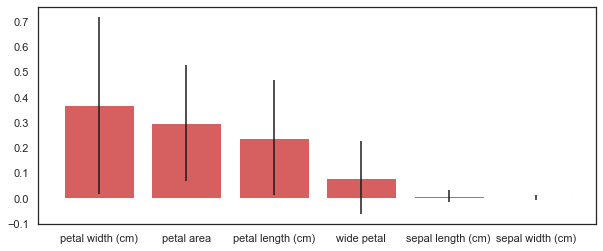

In [44]:
# Feature Selection

f_names = df.columns
f_importances = clf.feature_importances_
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_names, f_importances, f_std)
zzs = sorted(zz, key=lambda x: x[1], reverse=True)

labels = [x[0] for x in zzs]
imps = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

plt.figure(figsize=(10,4))
plt.bar(range(df.shape[1]), imps, color='r', yerr=errs, align='center')
plt.xticks(range(len(f_importances)), labels)

As we expected, based upon our earlier visual analysis, the petal length and width have more discriminative power when differentiating between the iris
classes. 

And as I mentioned when we checked the correlation between our features, sepal length and sepal width seems to contribute very little to our model's accuracy.

How did we get this? The random forest has a method called `.feature_importances_` that returns the relative performance of the feature for splitting at the leaves. If a feature is able to consistently and cleanly split a group into distinct classes, it will have a high feature importance.

You'd notice that we included the standard deviation, which helps to illustrate how consistent each feature is. This is generated by taking the feature importance, for each of the features, for each ten trees, and calculating the standard deviation.


Let's now take a look at one more example using Scikit-learn. We will now switch out our classifier and use a **support vector machine (SVM)**:

In [45]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(kernel='linear'))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

svc = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
svc['correct'] = svc.apply(lambda x: 1 if x.predicted == x.actual else 0, axis=1)
svc

,predicted,actual,correct
0,VER,VER,1
1,VER,VER,1
2,VER,VER,1
3,VIR,VIR,1
4,VIR,VIR,1
5,VER,VER,1
6,VIR,VIR,1
7,SET,SET,1
8,VER,VER,1
9,VIR,VIR,1


Now let's execute the following line of code;

In [46]:
svc['correct'].sum() / svc['correct'].count()

0.9333333333333333

Here we used SVM instead of Random Forest Classifier without changing any of our code, except for the part where we imported in Support Vector Classifier and instantiated the model. This is just a taste of the unparalled power that Scikit-learn offers.

I'd strongly suggest that you'd go to the [Scikit-learn docs](https://scikit-learn.org/) and check out some of the other ML algorithms that Scikit-learn has to offer.

## Final Notes

With this, we're done with this introductory guide to Data Analysis and Machine Learning. 

In this article, we learned how to take our data, step by step, through each stage of Data Analysis and Machine Learning. We also learned the key features of each of the primary libraries in the Python scientific stack. 

In subsequent articles, we will take this knowledge and begin to apply them to create unique and useful machine learning applications. Stay tuned!

Meanwhile, like and share this article if you find it insightful. You may also say hi to me on [Twitter](https://twitter.com/steveddev) and [LinkedIn](https://www.linkedin.com/in/steven-kolawole-80/). Have fun!

Note: This article was heavily inspired by [Python Machine Learning Blueprints by Alexander T. Combs](https://www.amazon.com/Python-Machine-Learning-Blueprints-developing-ebook/dp/B07JLMHWRG).